In [6]:
library(tidyverse) # metapackage with lots of helpful functions
library(e1071)
library(distr)

In [7]:
df_hosp <- read_csv('/kaggle/input/dataset-hospital-readmissions-binary/hospital-readmissions-orig.csv')

Parsed with column specification:
cols(
  race = col_double(),
  gender = col_double(),
  age = col_double(),
  admission_type_id = col_double(),
  discharge_disposition_id = col_double(),
  admission_source_id = col_double(),
  time_in_hospital = col_double(),
  num_lab_procedures = col_double(),
  num_procedures = col_double(),
  num_medications = col_double(),
  number_outpatient = col_double(),
  number_emergency = col_double(),
  number_inpatient = col_double(),
  diag_1 = col_double(),
  diag_2 = col_double(),
  diag_3 = col_double(),
  number_diagnoses = col_double(),
  readmitted = col_double()
)



In [8]:
head(df_hosp)

race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmitted
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,3,1,1,7,2,44,1,16,0,0,0,8,250.43,403.0,7,0
2,1,4,1,1,7,1,51,0,8,0,0,0,197,157.00,250.0,5,0
2,0,8,2,1,4,13,68,2,28,0,0,0,398,427.00,38.0,8,0
2,0,9,3,3,4,12,33,3,18,0,0,0,434,198.00,486.0,8,0
0,1,6,2,1,4,7,62,0,11,0,0,0,157,288.00,197.0,7,1
2,0,4,1,3,7,7,60,0,15,0,1,0,428,250.43,250.6,8,1


Checking how the data is distributed

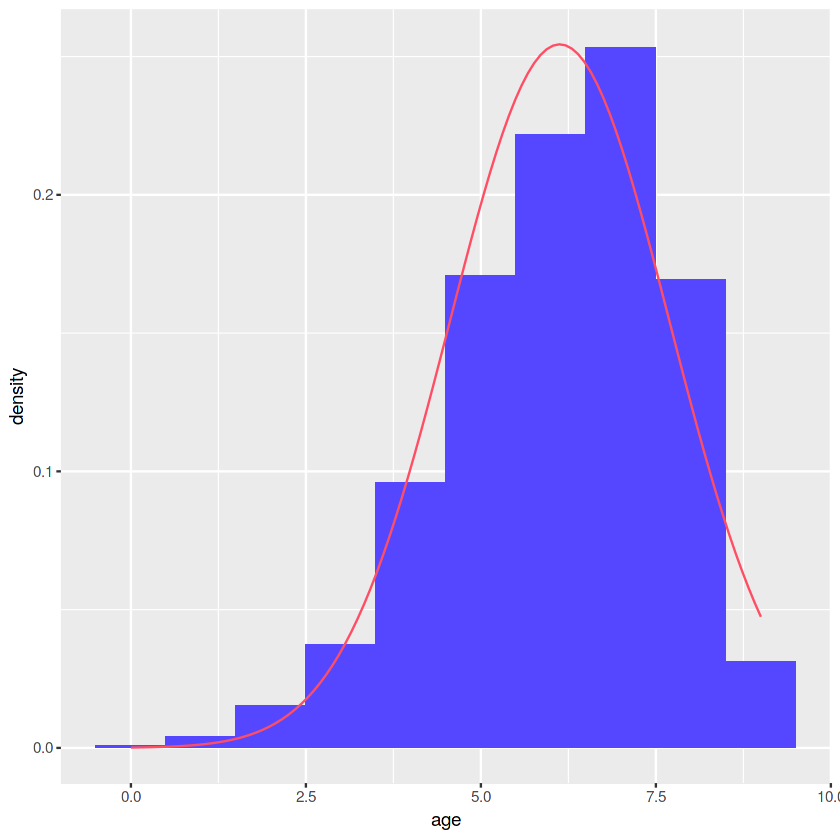

In [70]:
ggplot(data = df_hosp, aes(x=age)) +
geom_histogram(mapping = aes(y=..density..),binwidth=1,fill='#5447ff') +
stat_function(fun = dnorm, args = list(mean = mean(df_hosp$age), sd = sd(df_hosp$age)),color='#ff4d64')

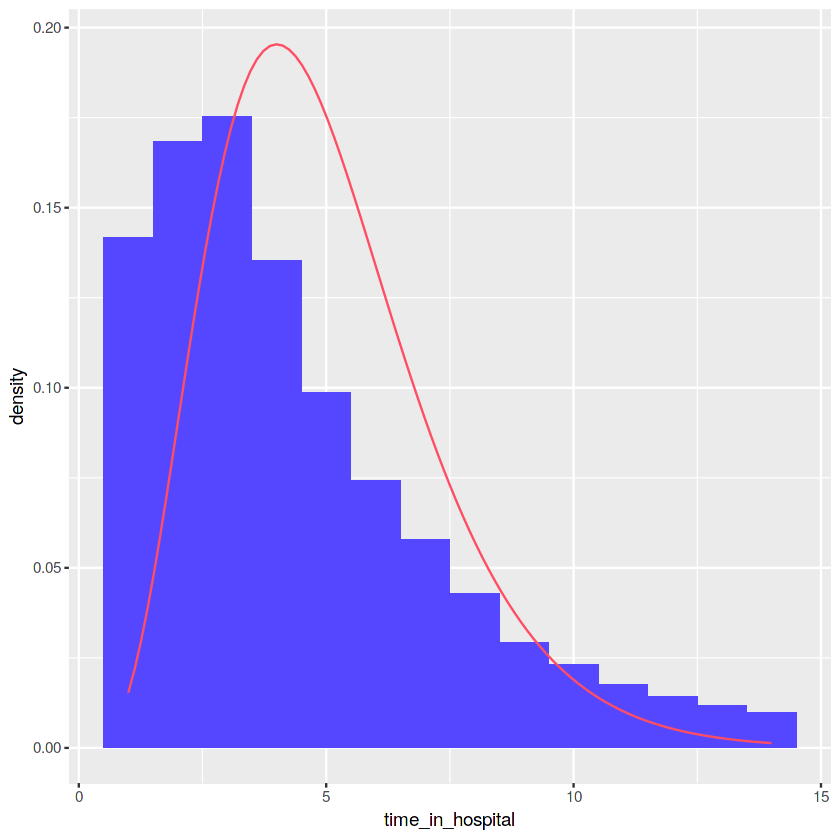

In [69]:
ggplot(data = df_hosp, aes(x=time_in_hospital)) +
geom_histogram(mapping = aes(y=..density..),binwidth=1,fill='#5447ff') +
stat_function(fun = dgamma, args = list(scale=1,shape=5),color='#ff4d64')

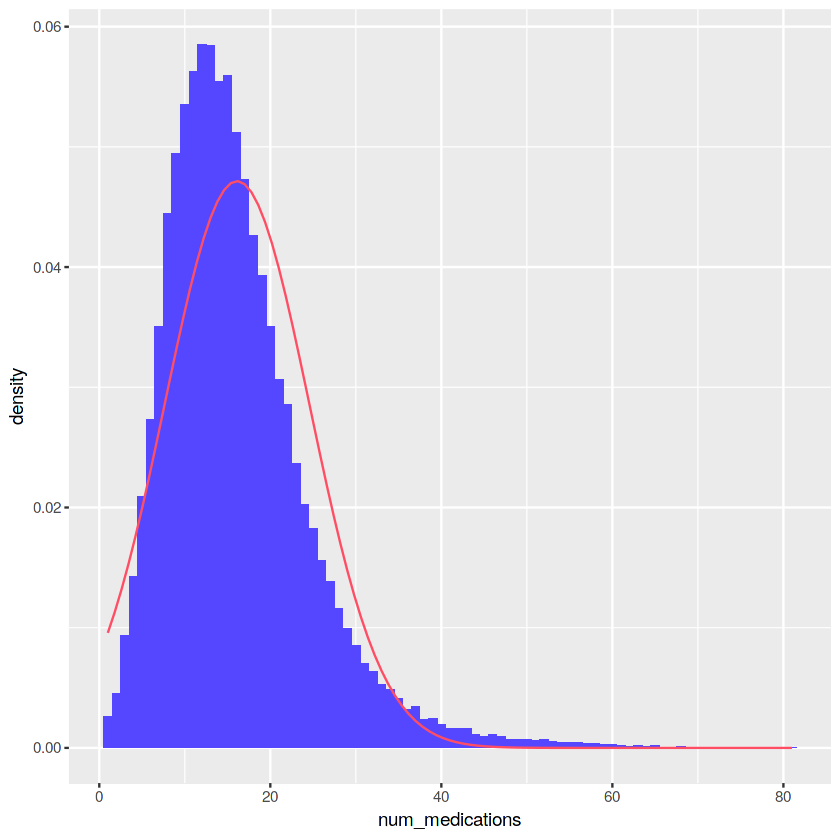

In [68]:
#num_medications
ggplot(data = df_hosp, aes(x=num_medications)) +
geom_histogram(mapping = aes(y=..density..),binwidth=1,fill='#5447ff') +
stat_function(fun = dnorm, args = list(mean = mean(df_hosp$num_medications), sd = sd(df_hosp$num_medications)),color='#ff4d64')

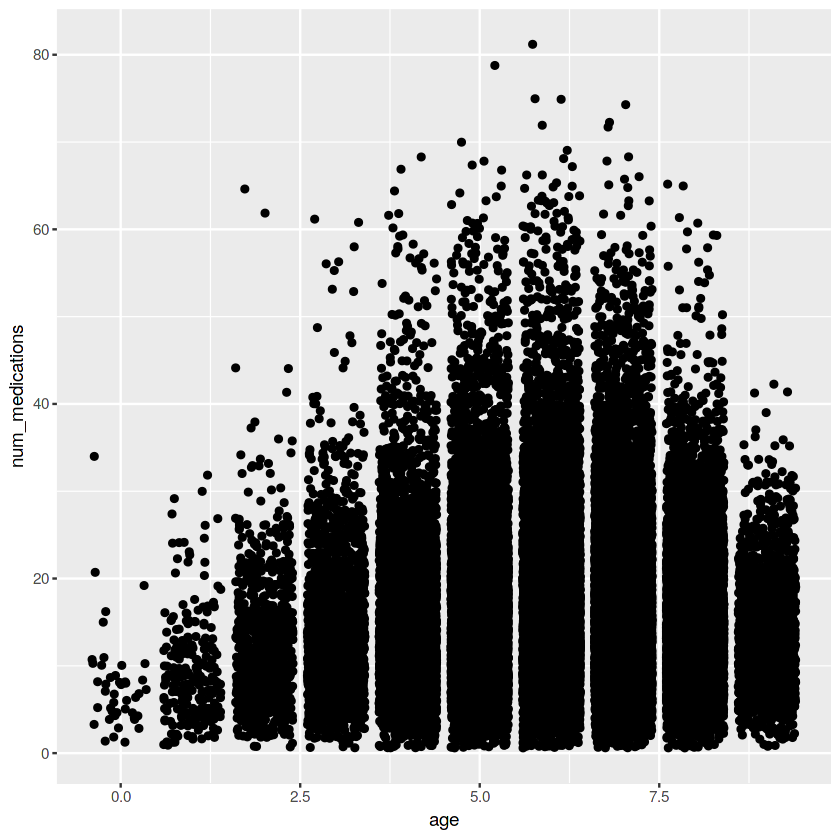

In [89]:
ggplot(data = df_hosp) +
geom_point(mapping = aes(x = age, y = num_medications),position='jitter')

<b>Linear model, does the age determine how many medications the patient takes?</b>

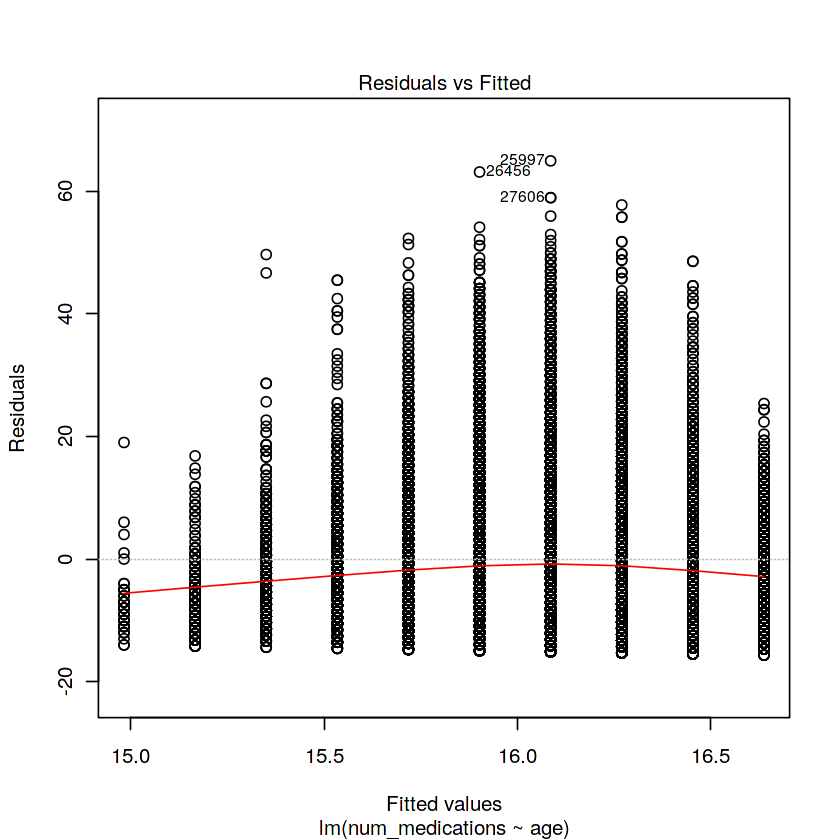

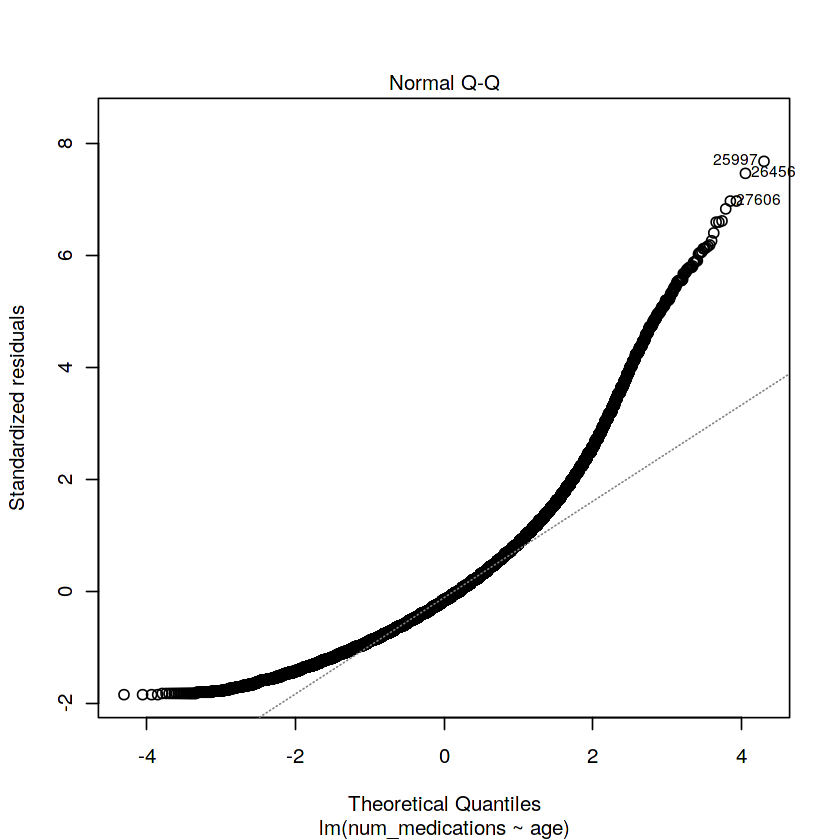

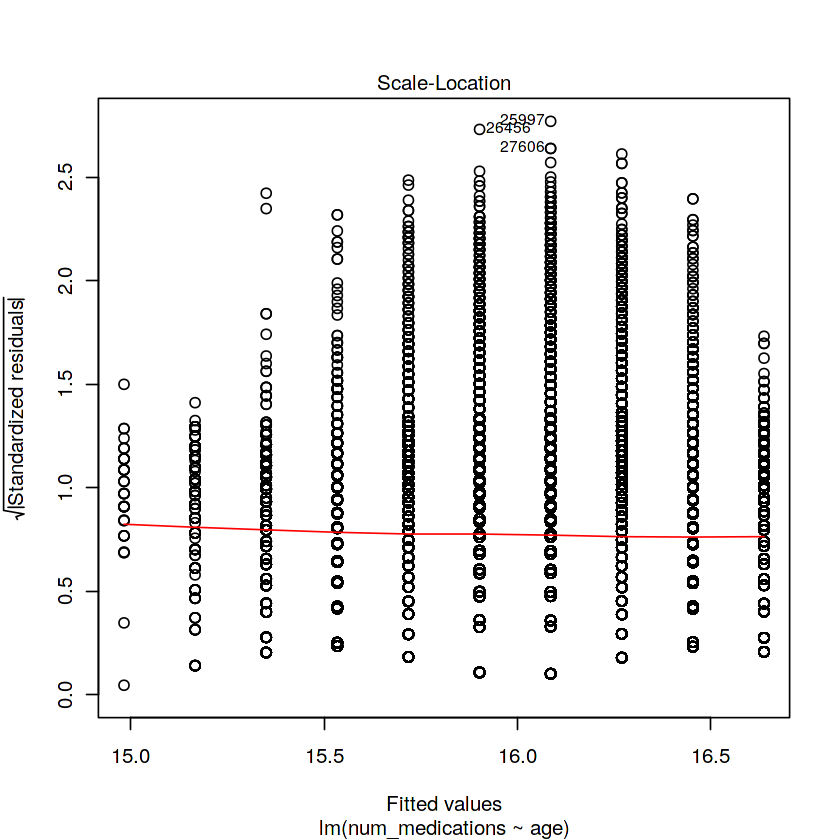

(Intercept)         age 
 14.9824725   0.1839957

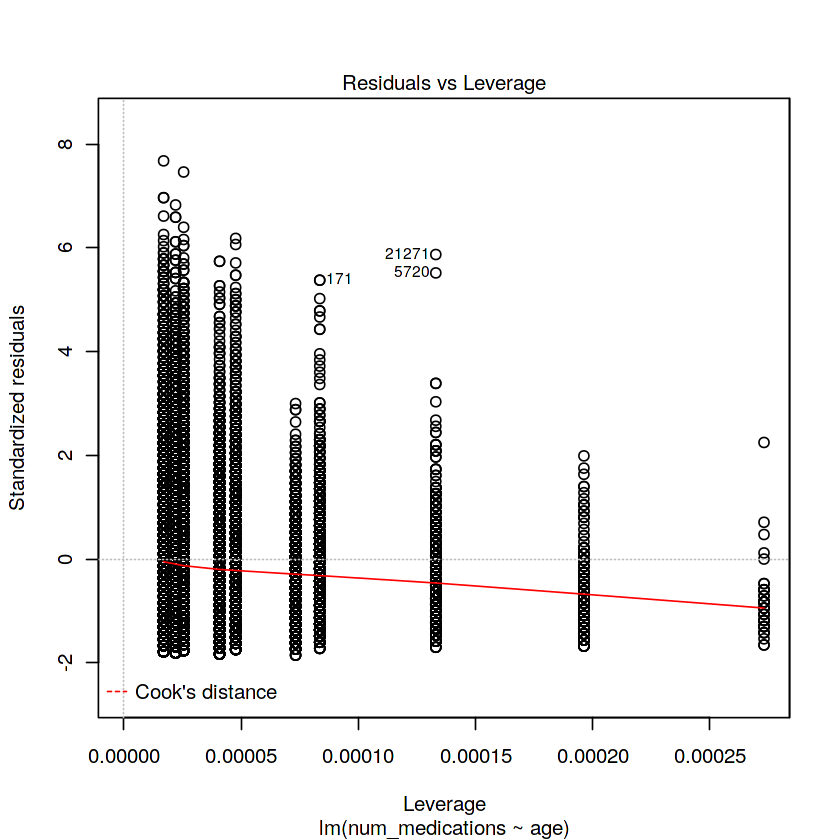

In [82]:
#theorising the number of medications is predicted by the age
linear_regression_model <- lm(num_medications~age,df_hosp)
plot(linear_regression_model)
coef(linear_regression_model)

#looking at the output, there is only a weak correlation for this

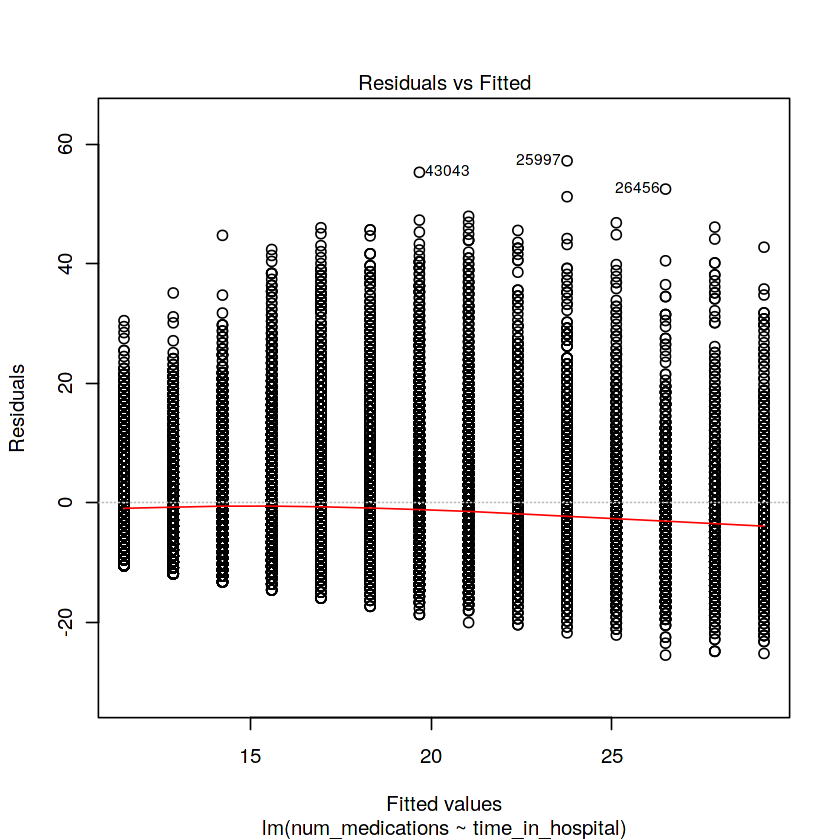

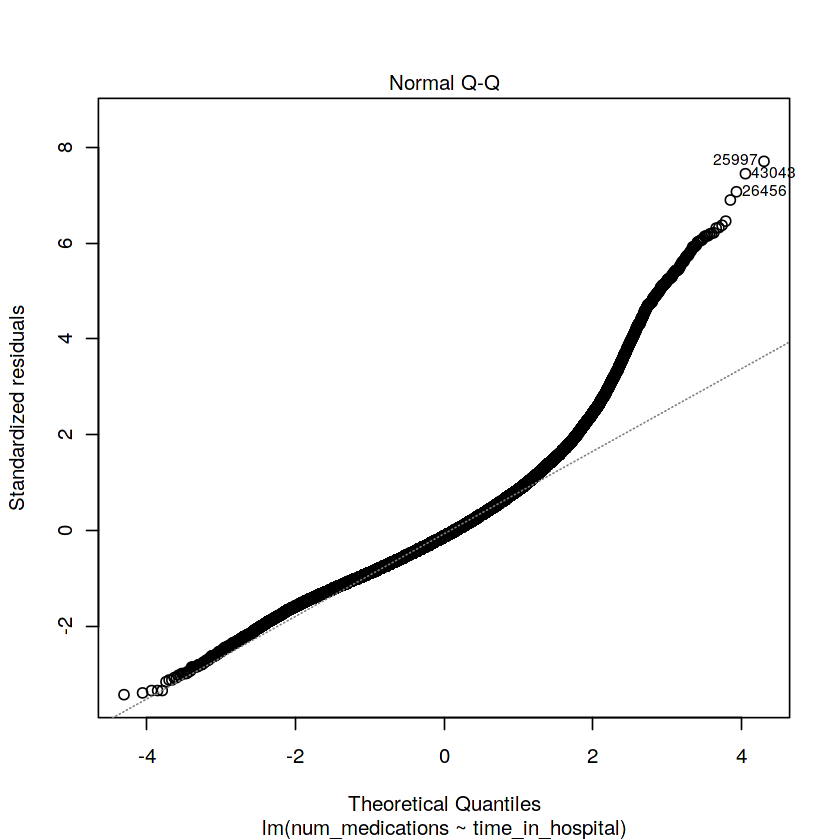

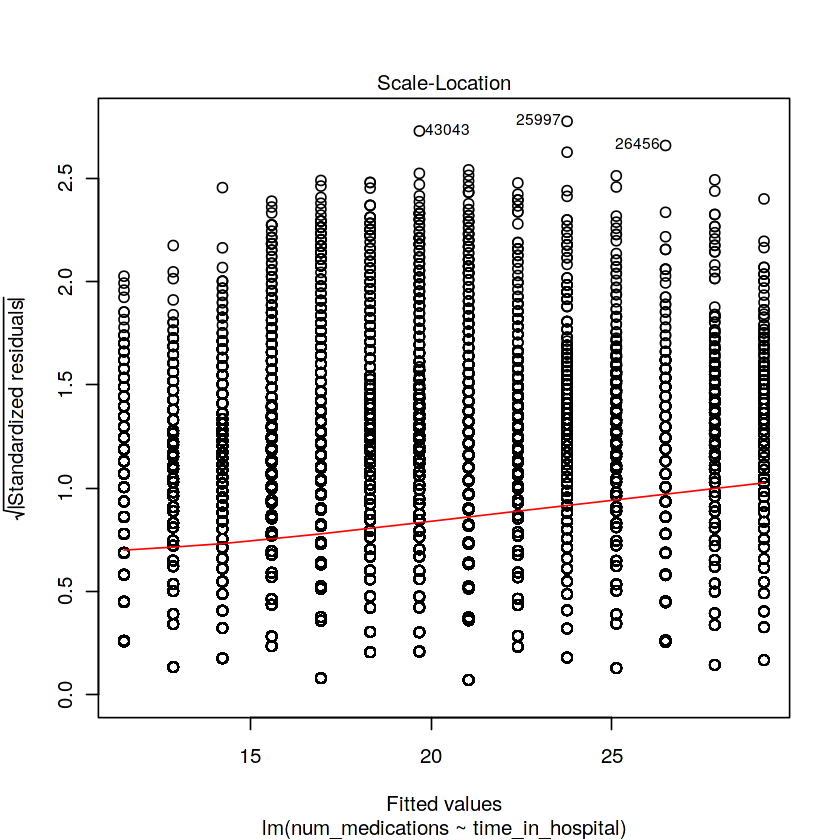

(Intercept) time_in_hospital 
       10.143997         1.361693

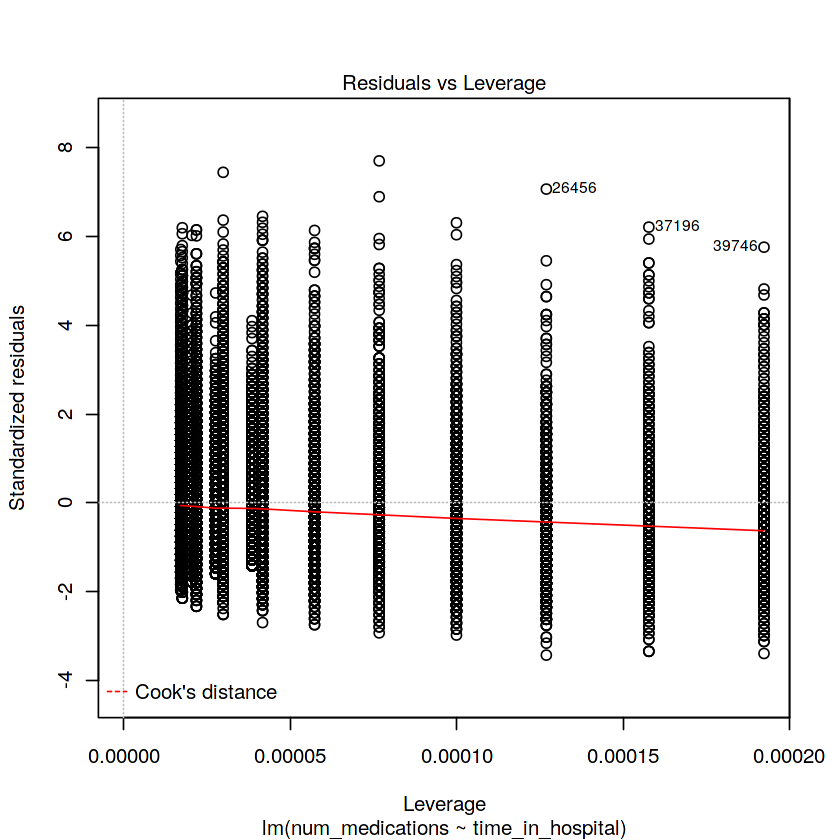

In [97]:
linear_regression_model <- lm(num_medications~time_in_hospital,df_hosp)
plot(linear_regression_model)
coef(linear_regression_model)

In [95]:
#generalised least squares, linear model and generlised linear model
#for logistic, parameter family='binomial' on the glm function
#help(gls),help(lm),help(glm)

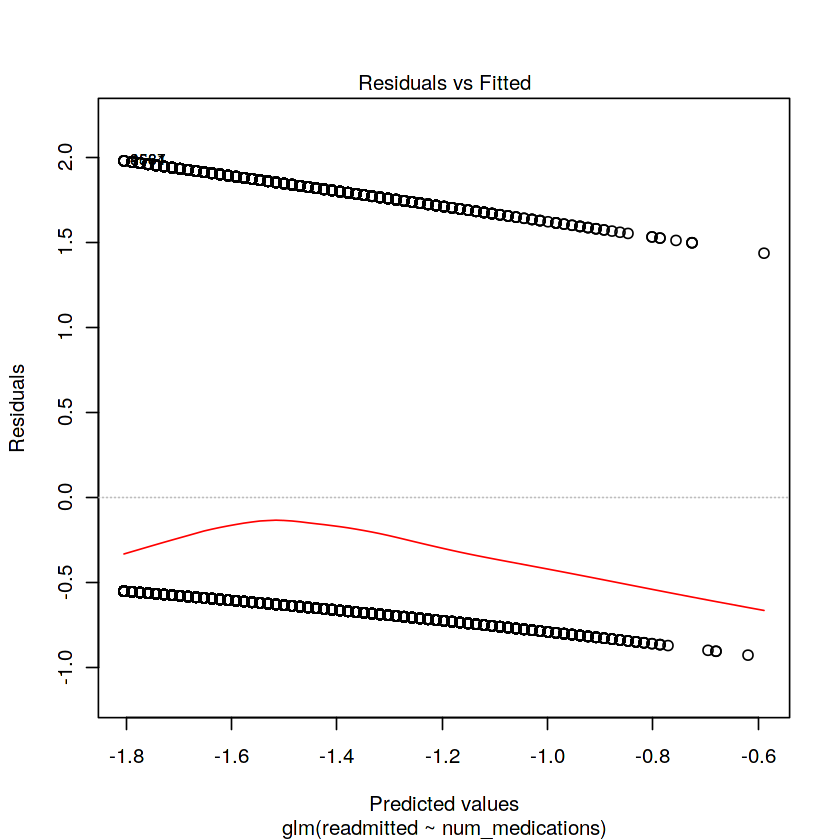

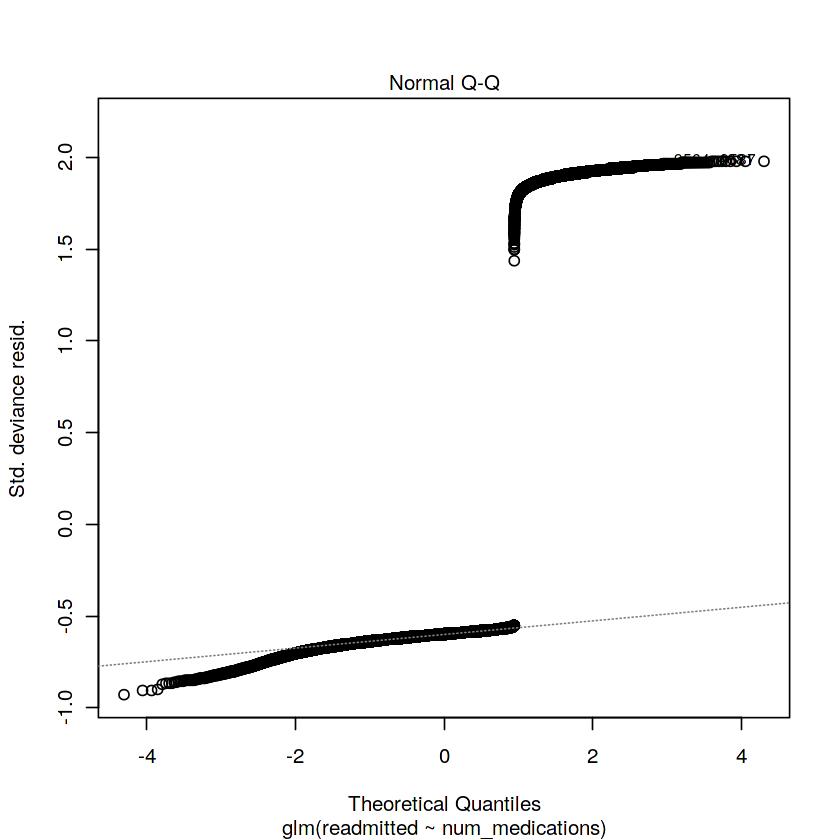

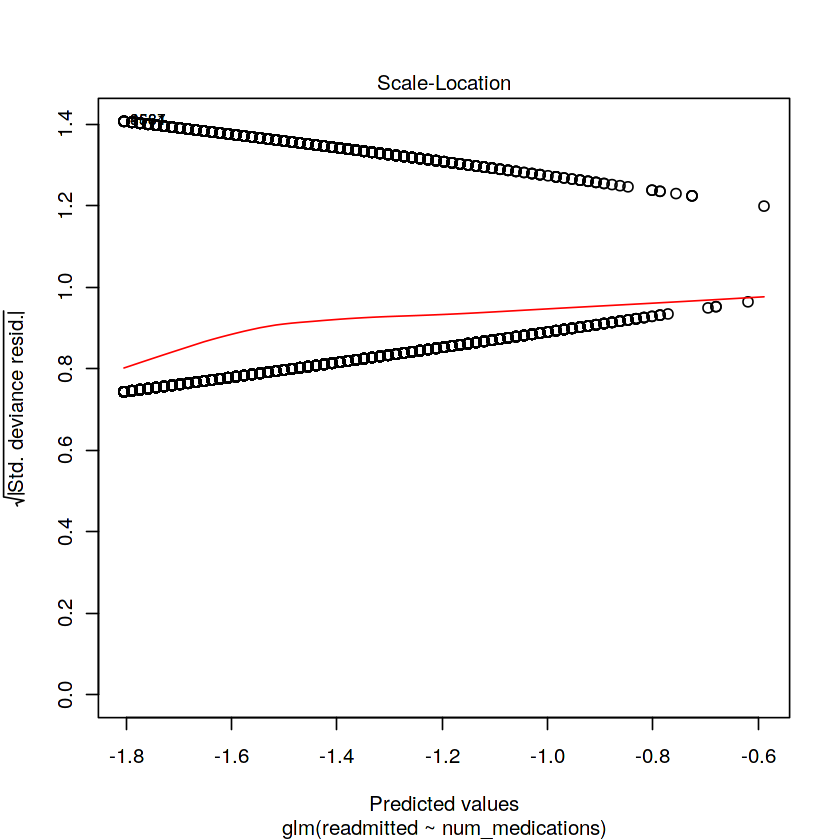

(Intercept) num_medications 
    -1.81978480      0.01519831

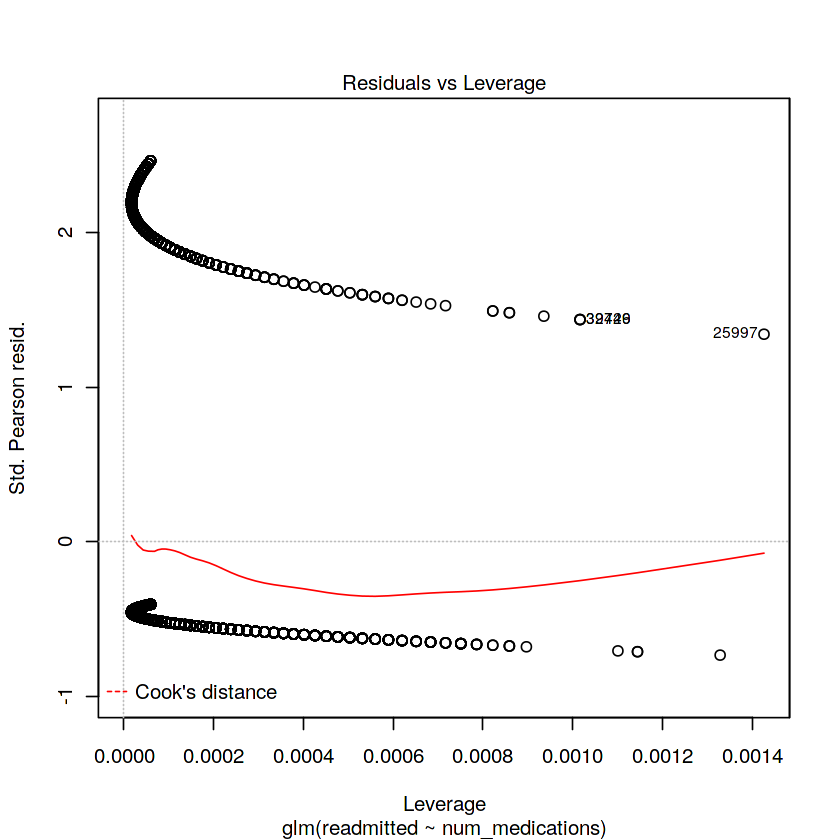

In [100]:
logistic_regression_model <- glm(readmitted~num_medications,df_hosp,family='binomial')
plot(logistic_regression_model)
coef(logistic_regression_model)